In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product e.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product E,Anti Biotic Respiratory,January,2019,57650,303130,2978499,1
2019-02-01,Product E,Anti Biotic Respiratory,February,2019,66035,347219,3411712,2
2019-03-01,Product E,Anti Biotic Respiratory,March,2019,88208,463807,4557285,3
2019-04-01,Product E,Anti Biotic Respiratory,April,2019,74712,392844,3860011,4
2019-05-01,Product E,Anti Biotic Respiratory,May,2019,61172,321649,3160464,5
2019-06-01,Product E,Anti Biotic Respiratory,June,2019,48721,256180,2517181,6
2019-07-01,Product E,Anti Biotic Respiratory,July,2019,51556,271087,2663652,7
2019-08-01,Product E,Anti Biotic Respiratory,August,2019,70726,371885,3654074,8
2019-09-01,Product E,Anti Biotic Respiratory,September,2019,70502,370707,3642501,9


In [4]:
sales_e= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_e.shape

(60, 3)

In [6]:
sales_e.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_e['Sales'].sum())
print('Total Market Size:',sales_e['Market Size'].sum())
print('Total Marketing Expense:', sales_e['Marketing Expense'].sum())

Total Sales: 4925930
Total Market Size: 22616686
Total Marketing Expense: 97983937


Text(0.5, 1.0, 'Product E')

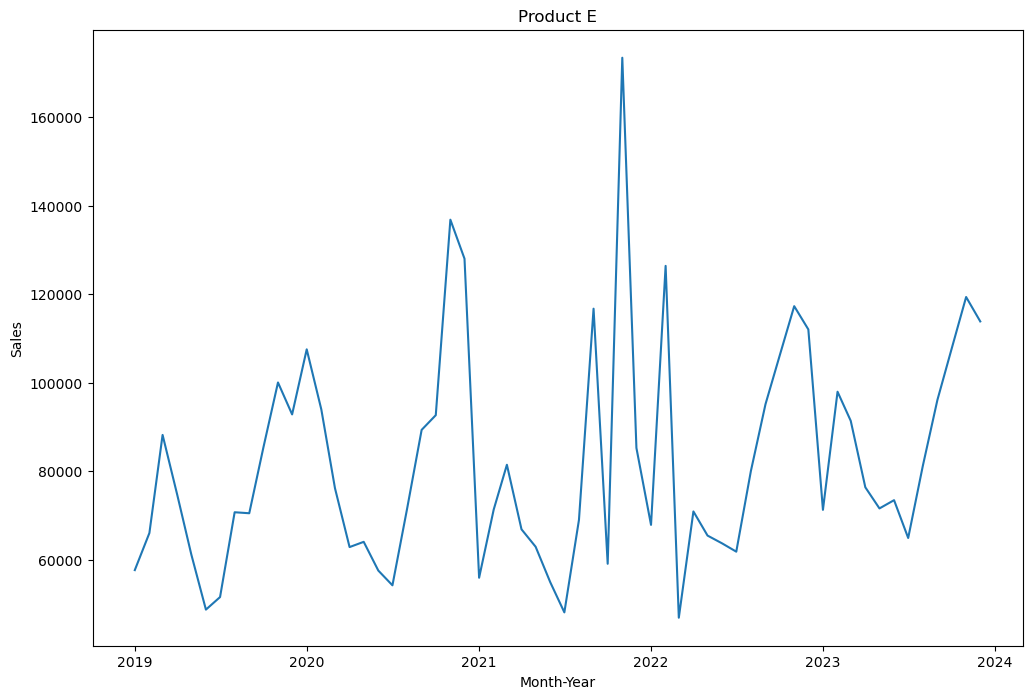

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_e['Sales'])
plt.title('Product E')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_e['Sales'])

ADF Statistics: -1.547517694729824
p- value: 0.5098879012430942
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_e_diff= sales_e['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product E - First Difference')

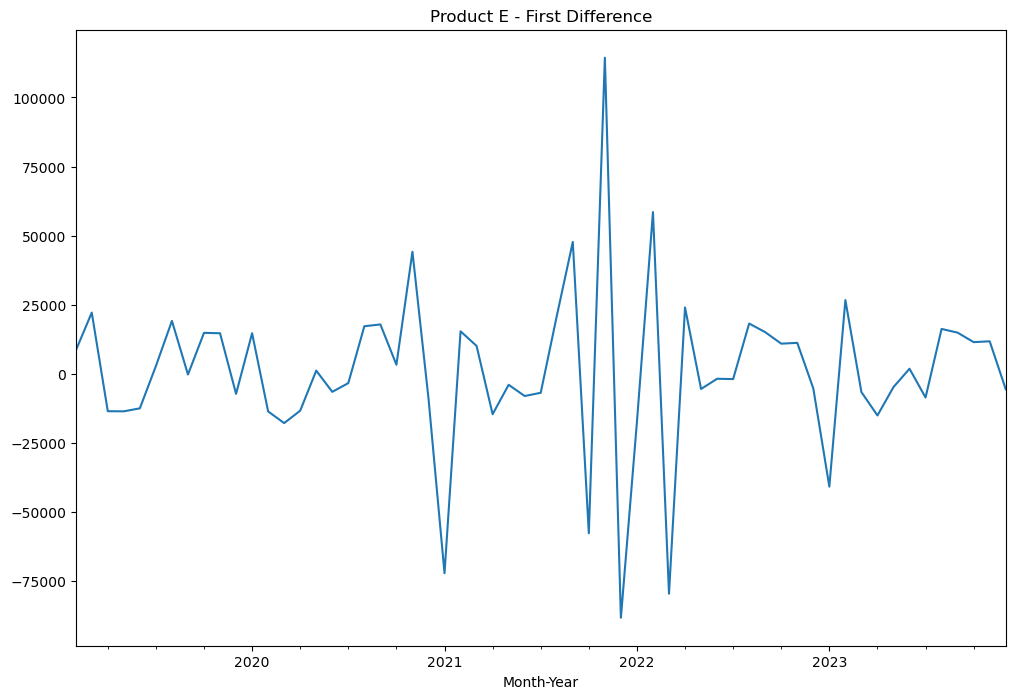

In [13]:
sales_e_diff.plot(figsize=(12,8))
plt.title('Product E - First Difference')

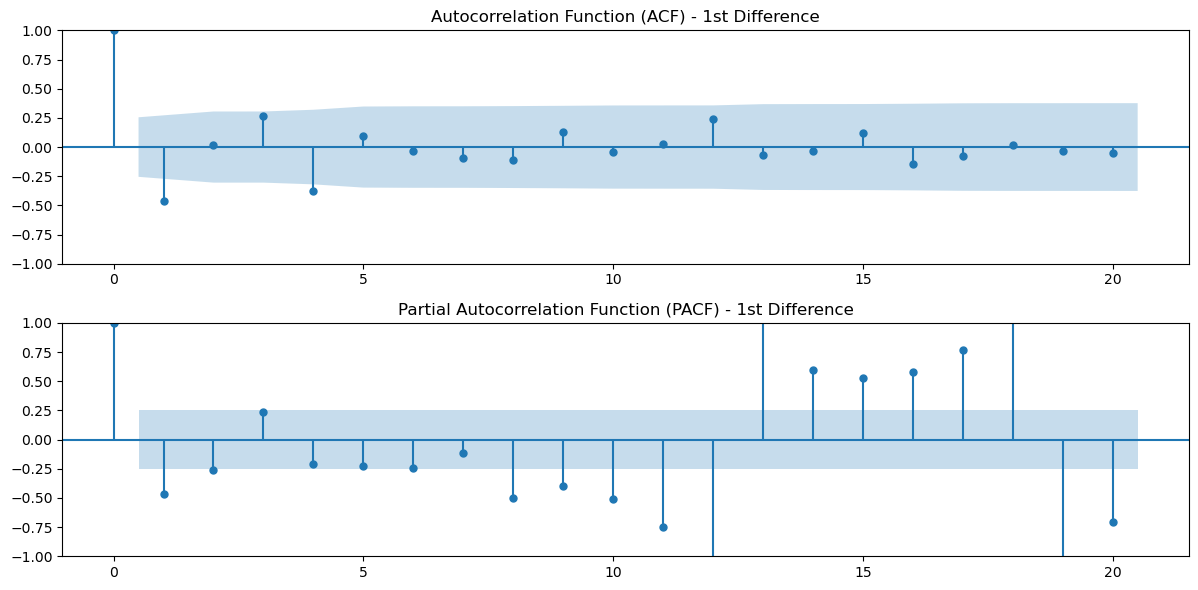

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_e_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_e_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_e_diff)

ADF Statistics: -6.125883961889508
p- value: 8.631648926998655e-08
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_e[:57]
test=sales_e[57:]

In [17]:
print(len(train),len(test))

57 3


In [82]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [83]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [84]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [17]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_e)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [18]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
7   2  1  1287.153764  1299.305875  15146.326416  2.663832e+08  16321.249748
4   1  1  1287.232543  1297.359302  15265.987393  2.699083e+08  16428.886438
1   0  1  1287.384852  1295.486259  16047.061178  3.013974e+08  17360.801883
10  3  1  1288.160540  1302.338002  15546.487435  2.702176e+08  16438.296297
2   0  2  1289.154990  1299.281748  15176.338540  2.681836e+08  16376.312414
8   2  2  1289.459745  1303.637206  15345.735134  2.698230e+08  16426.289173
11  3  2  1289.748920  1305.951733  16122.713345  2.903239e+08  17038.894523
13  4  1  1289.855892  1306.058706  16697.126649  3.059210e+08  17490.598571
5   1  2  1290.397295  1302.549406  15221.705418  2.686077e+08  16389.255445
6   2  0  1291.014256  1301.141014  15060.534841  2.440043e+08  15620.636116
16  5  1  1291.389433  1309.617599  17752.265173  3.347680e+08  18296.666800
14  4  2  1291.511452  1309.739617  15923.920163  2.817958e+08  16786.773343

In [19]:
m_arima= ARIMA(train['Sales'], order=(2,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   57
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -637.577
Date:                Thu, 09 May 2024   AIC                           1287.154
Time:                        17:33:41   BIC                           1299.306
Sample:                    01-01-2019   HQIC                          1291.865
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1548      0.015     10.345      0.000       0.125       0.184
Marketing Expense    -0.0042      0.003     -1.217      0.224      -0.011       0.003
ar.L1                -0.

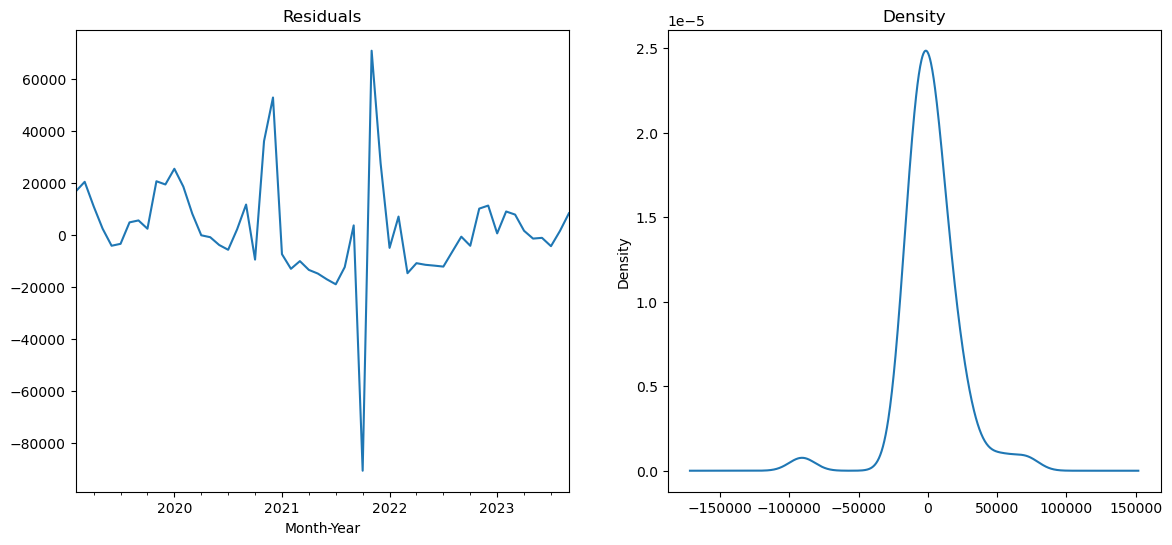

In [20]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

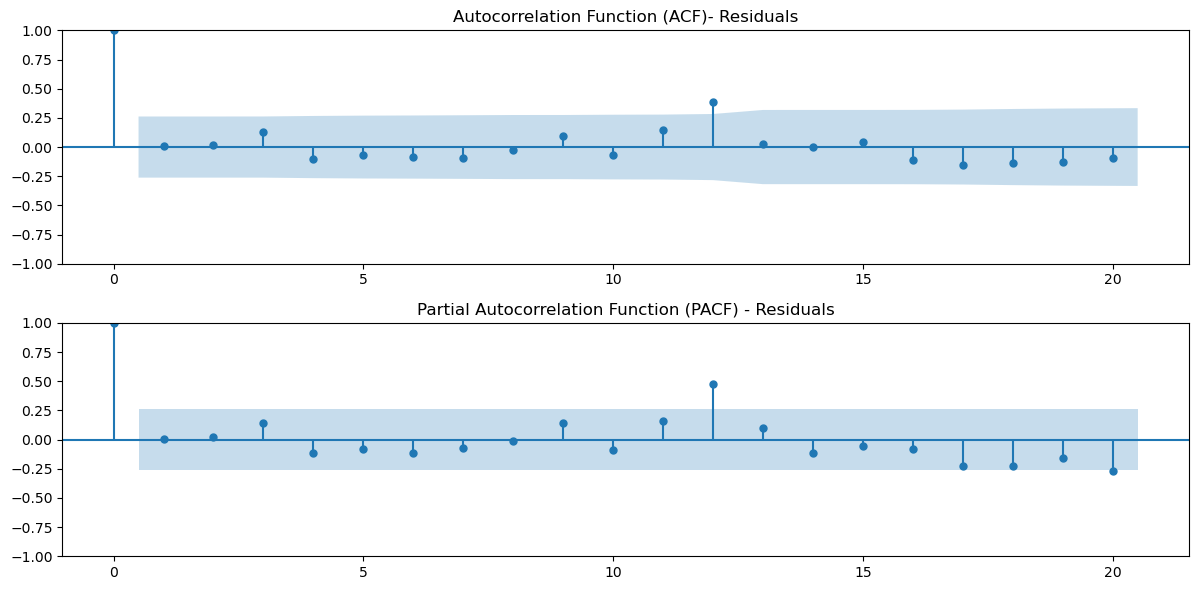

In [21]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

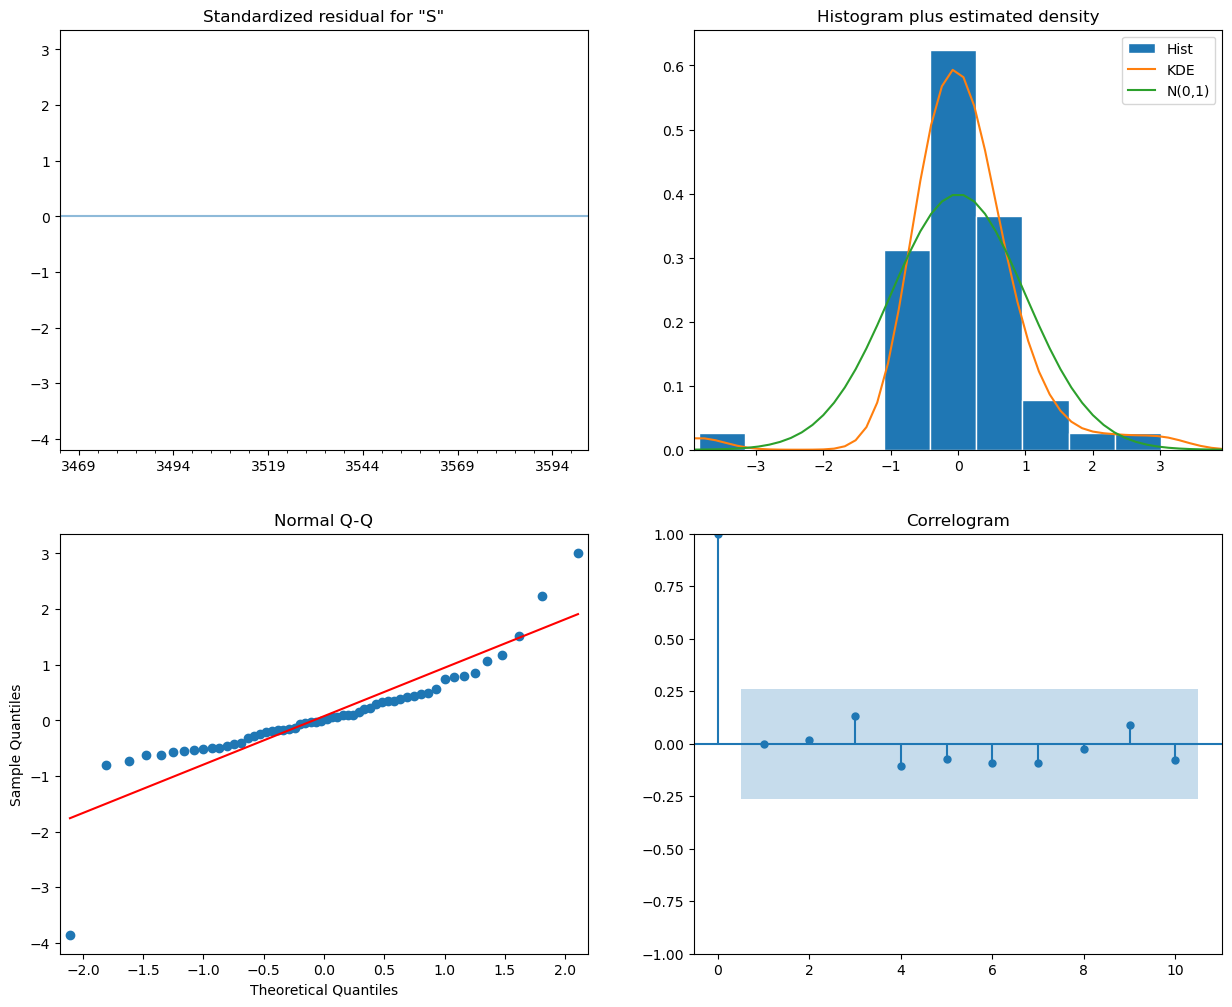

In [22]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [23]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [24]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [25]:
pred=model_arima.predict(start=len(train), end=(len(sales_e)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_e['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [26]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

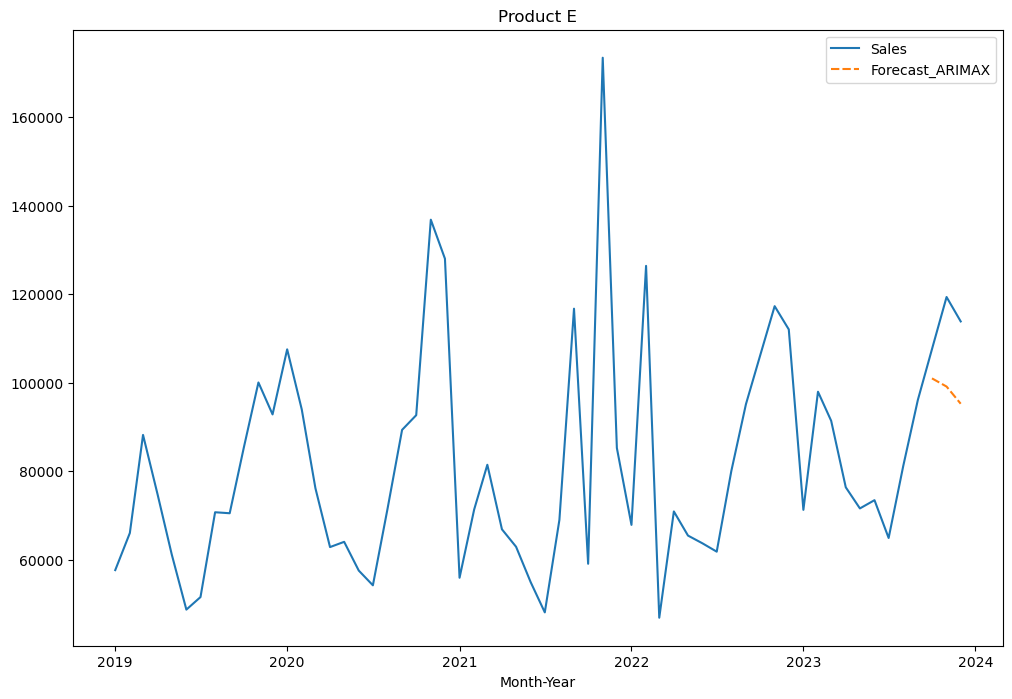

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_e[['Sales','Forecast_ARIMAX']])
plt.title('Product E')
plt.show()

In [28]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 15146.326416472113
MAPE - ARIMAX: 0.13141928727752913
MSE - ARIMAX: 266383193.33176932
RMSE - ARIMAX: 16321.249747852316


# SARIMA

In [29]:
import statsmodels.api as sm

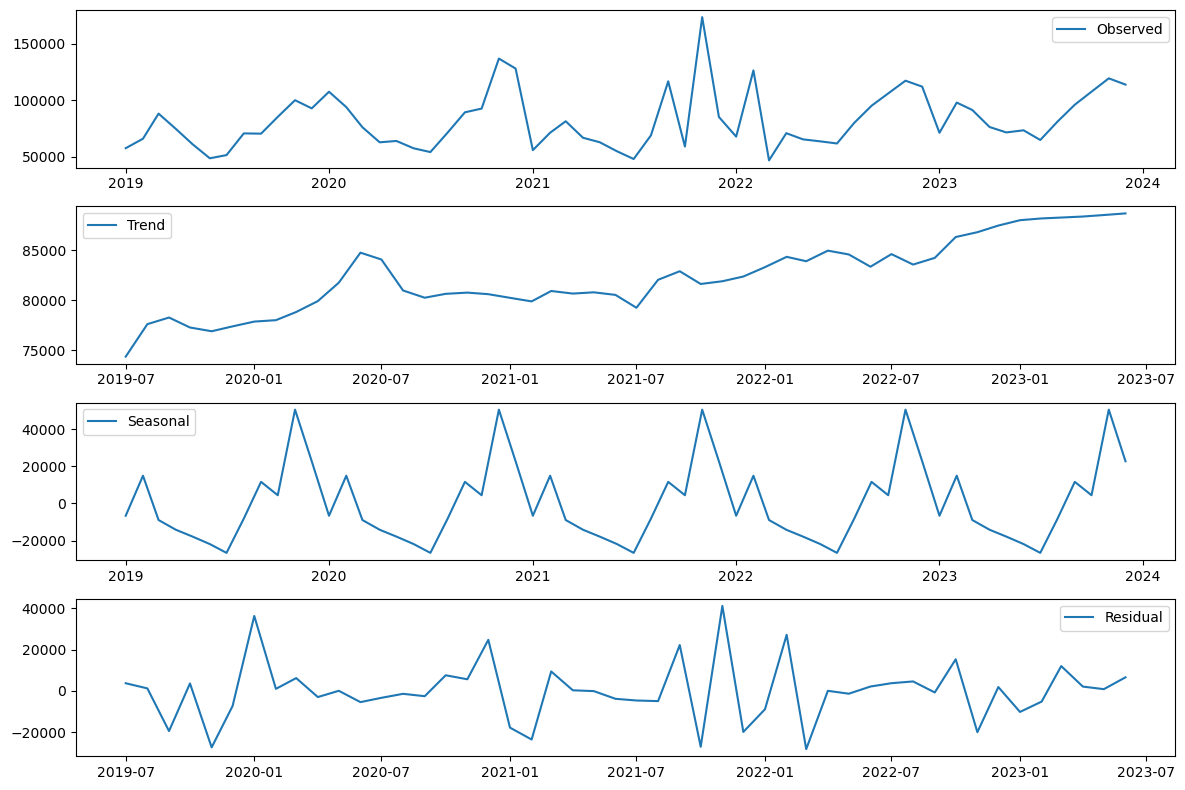

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_e['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

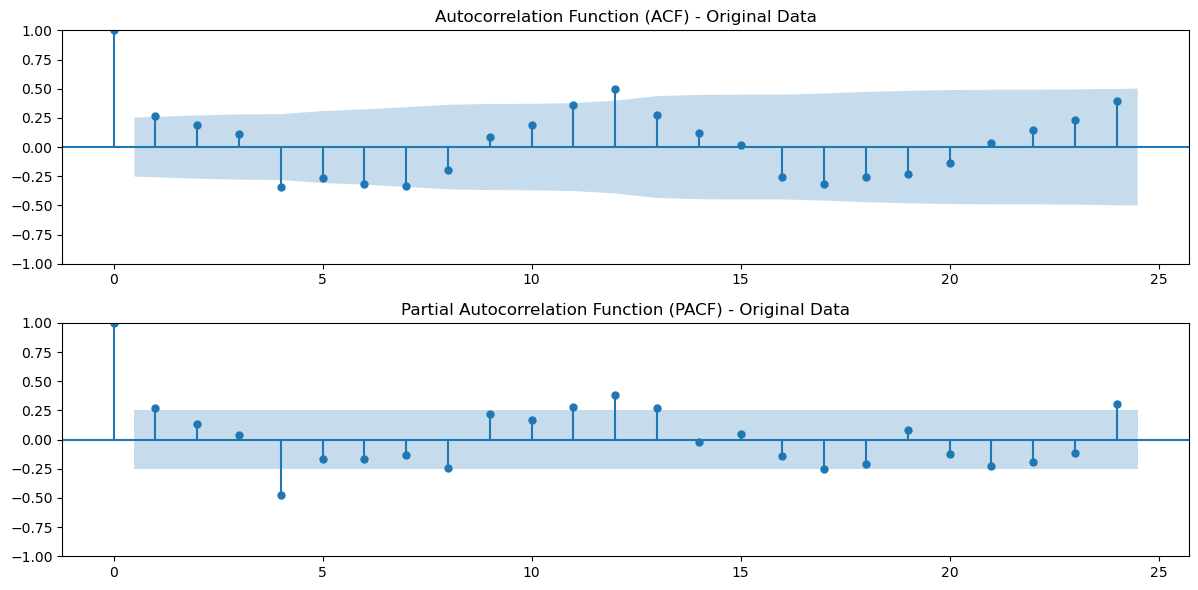

In [31]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_e['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_e['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

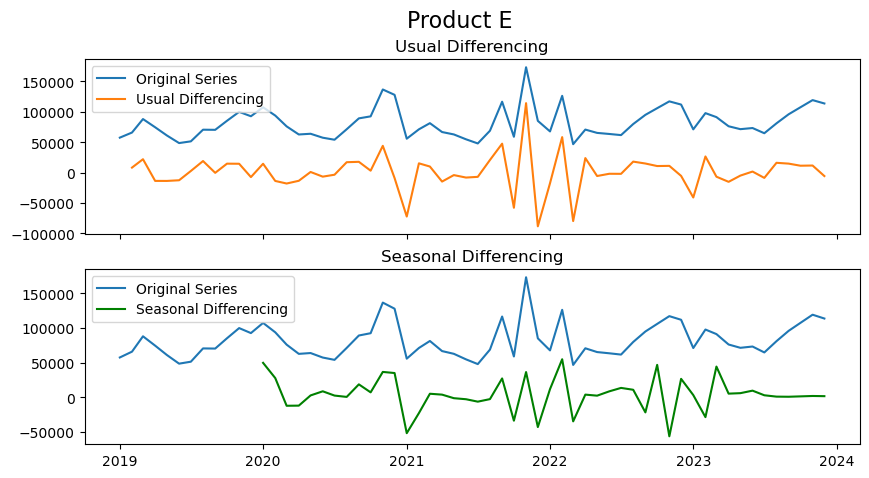

In [32]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_e['Sales'], label='Original Series')
axes[0].plot(sales_e['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_e['Sales'], label='Original Series')
axes[1].plot(sales_e['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product E', fontsize=16)
plt.show()

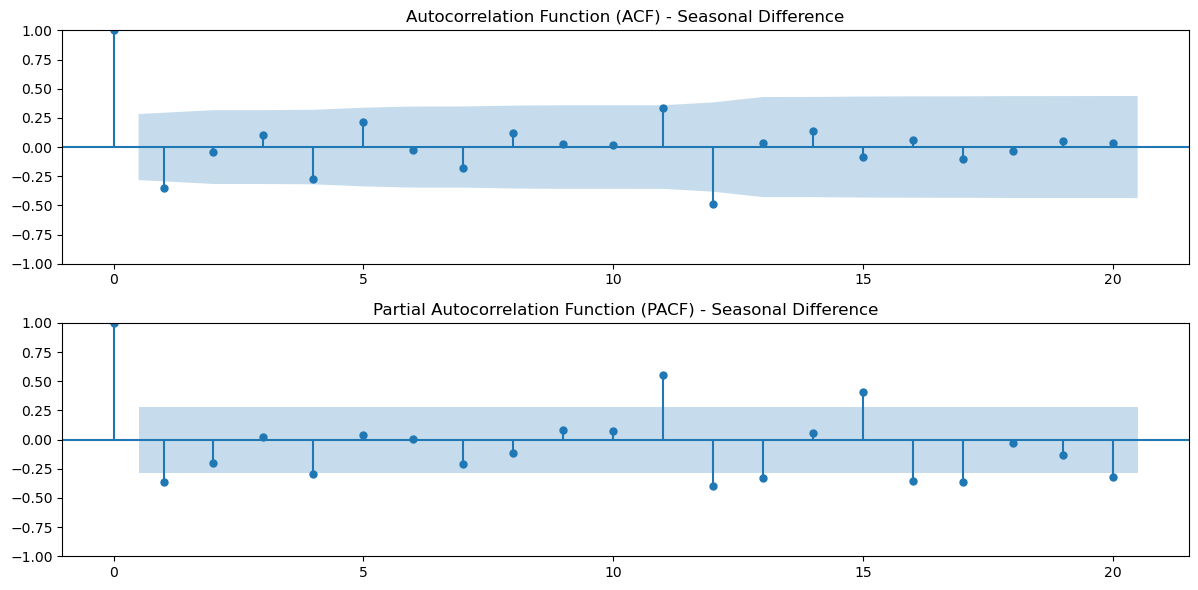

In [33]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_e['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_e['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

In [34]:
order_SARIMAX=[]
# Loop over P order
for P in range(6):
    # Loop over Q order
    for Q in range(3):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(2,1,1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [35]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic           mae           mse
9   3  0  1016.939231  1032.996938   2645.307346  1.590790e+07
10  3  1  1018.367278  1036.209174   3427.158532  2.233834e+07
12  4  0  1019.349772  1037.191668   4711.133482  3.723397e+07
13  4  1  1020.322765  1039.948851   4277.452306  2.998471e+07
1   0  1  1020.432659  1032.921986  13218.145335  2.538463e+08
11  3  2  1020.771861  1040.397947   3219.084548  2.159889e+07
15  5  0  1021.359074  1040.985160   4678.783017  3.683542e+07
4   1  1  1021.881512  1036.155029  11527.454444  1.975584e+08
2   0  2  1022.118129  1036.391646   8058.756757  1.030596e+08
16  5  1  1022.609122  1044.019397   2498.709302  1.165166e+07
7   2  1  1022.690931  1038.748638   7021.794895  6.607992e+07
14  4  2  1022.924043  1044.334318   3419.202835  2.017179e+07
5   1  2  1024.463308  1040.521015   5630.689299  4.670348e+07
17  5  2  1025.328016  1048.522482   2196.578636  9.936520e+06
6   2  0  1025.709190  1039.982708  10510.623712  1.132

In [36]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(2,1,1),seasonal_order=(3,1,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   57
Model:             SARIMAX(2, 1, 1)x(3, 1, [], 12)   Log Likelihood                -499.470
Date:                             Thu, 09 May 2024   AIC                           1016.939
Time:                                     17:45:47   BIC                           1032.997
Sample:                                 01-01-2019   HQIC                          1022.894
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1803      0.058      3.089      0.002       0.066       0.295
Market

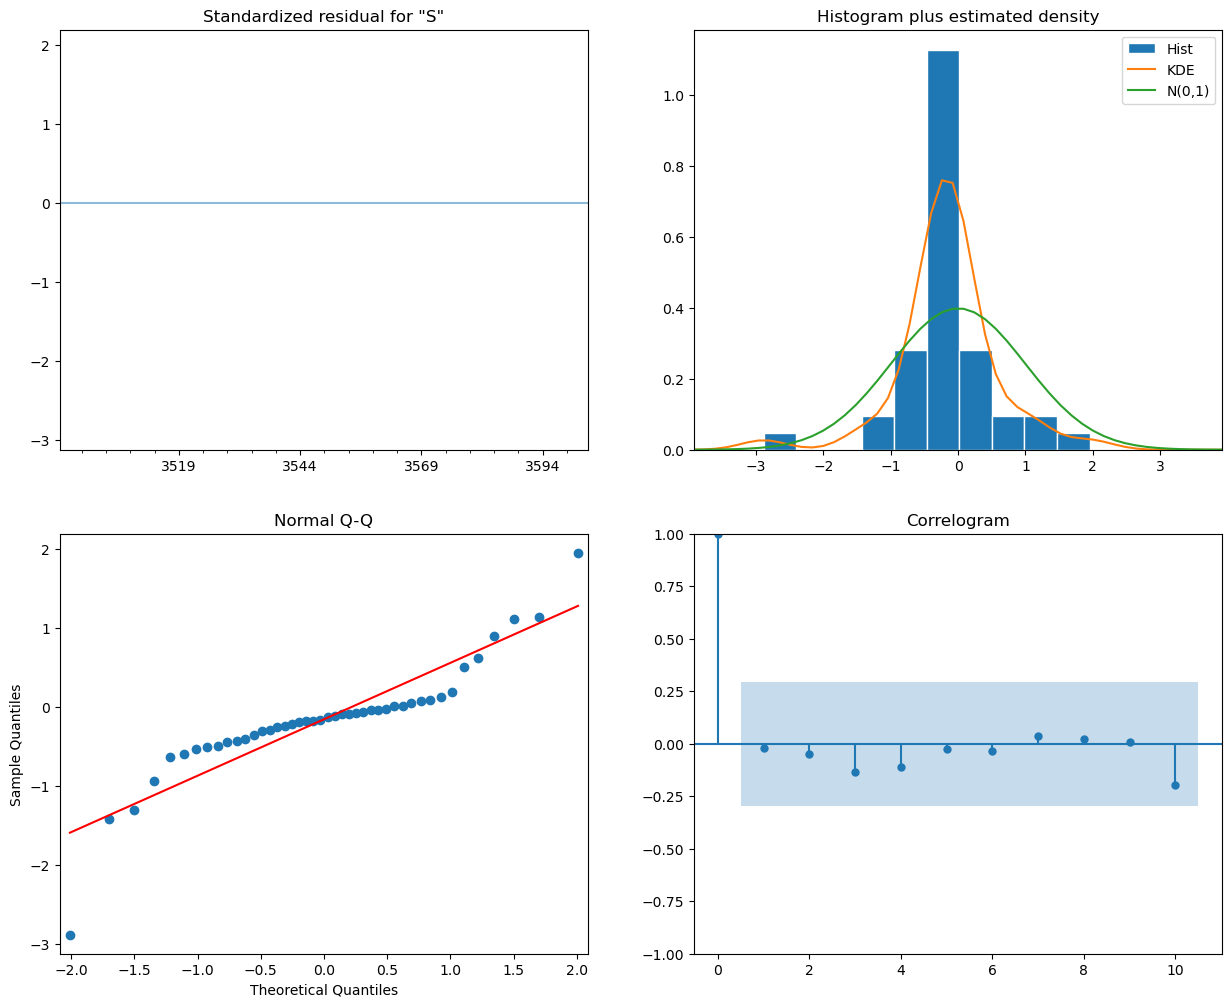

In [37]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [38]:
forecast_test_sarima=sarima_model.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [39]:
sales_e['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product E')

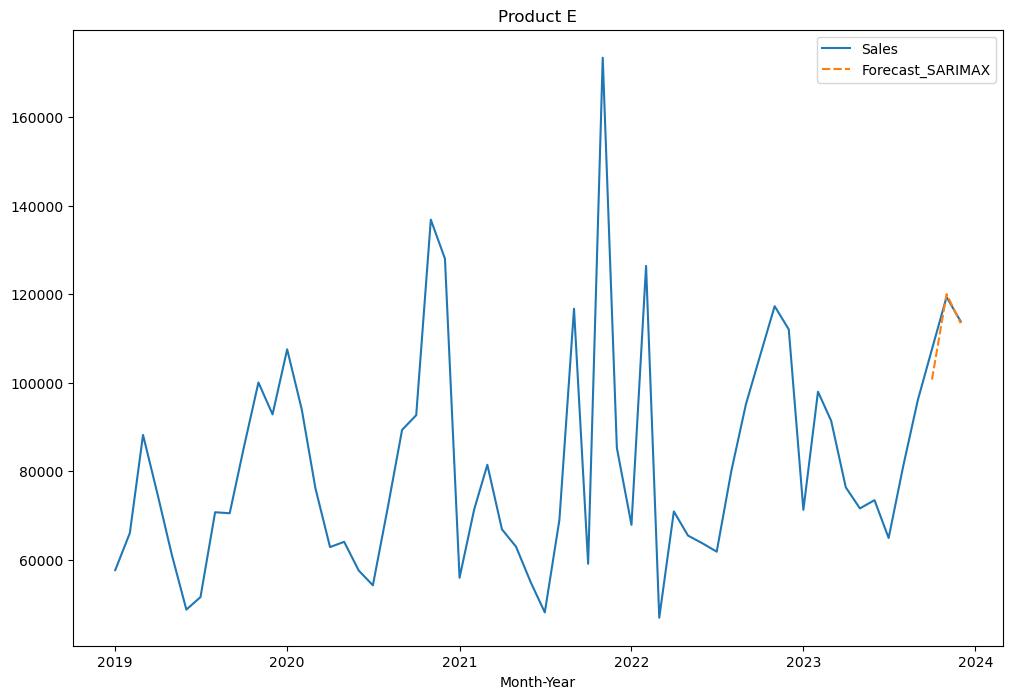

In [40]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_e[['Sales','Forecast_SARIMAX']])
plt.title('Product E')

In [41]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 2645.307
MAPE - SARIMAX: 0.024
MSE - SARIMAX: 15907900.903
RMSE - SARIMAX: 3988.471


# AUTO-ARIMA

In [42]:
import pmdarima as pm

In [43]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=6 ,max_Q=3 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1063.748, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1051.843, Time=0.38 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=1053.545, Time=1.87 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1049.973, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1053.674, Time=0.92 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=1055.375, Time=3.99 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1059.441, Time=0.46 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.54 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1055.672, Time=1.16 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=1057.336, Time=6.13 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=inf, Time=7.79 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=11.18 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=1057.501, Time=3.51 sec
 ARIMA(0,1,0)(4,1,0

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [44]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   57
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -510.705
Date:                            Thu, 09 May 2024   AIC                           1031.410
Time:                                    17:49:31   BIC                           1040.331
Sample:                                01-01-2019   HQIC                          1034.718
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2182      0.402     -3.033      0.002      -2.005      -0.431
ar.L2         -0.5733      0.192     -2.981      0.003      -0.950      -0.196
ma.L1          0.6005      0.460      1.305      0.192      -0.301       1.502
ma.S.L12      -0.6534      0.208     -3.147      0.002      -1.060      -0.246
sigma2      7.083e+08   4.02e-10   1.76e+18      0.000    7.08e+08    7.08e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 9.09
Prob(Q):                              0.66   Prob(JB):                         0.01
Heteroskedasticity (H):               0.18   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.86e+35. Standard errors may be unstable.
"""

In [45]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   57
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -510.705
Date:                            Thu, 09 May 2024   AIC                           1031.410
Time:                                    17:49:34   BIC                           1040.331
Sample:                                01-01-2019   HQIC                          1034.718
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2182      0.402     -3.033      0.002      -2.005      -0.431
ar.L2         -0.5733      0.192     -2.981      0.003      -0.950      -0.196
ma.L1          0.6005      0.460      1.305      0.192      -0.301       1.502
ma.S.L12      -0.6534      0.208     -3.147      0.002      -1.060      -0.246
sigma2      7.083e+08   4.02e-10   1.76e+18      0.000    7.08e+08    7.08e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 9.09
Prob(Q):                              0.66   Prob(JB):                         0.01
Heteroskedasticity (H):               0.18   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.86e+35. Standard errors may be unstable.
"""

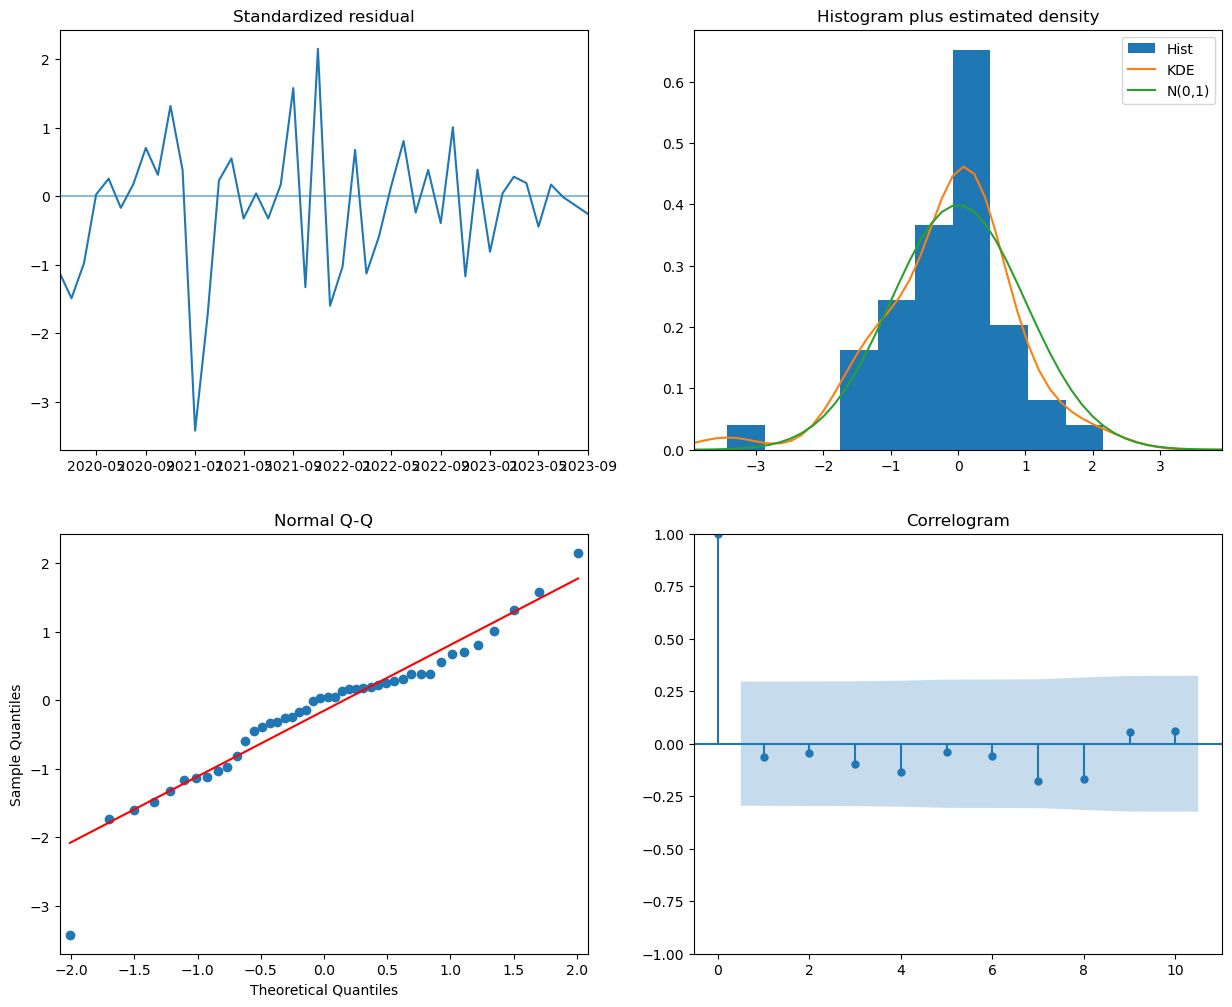

In [49]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [50]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_e['Forecast_AUTO ARIMA']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product E')

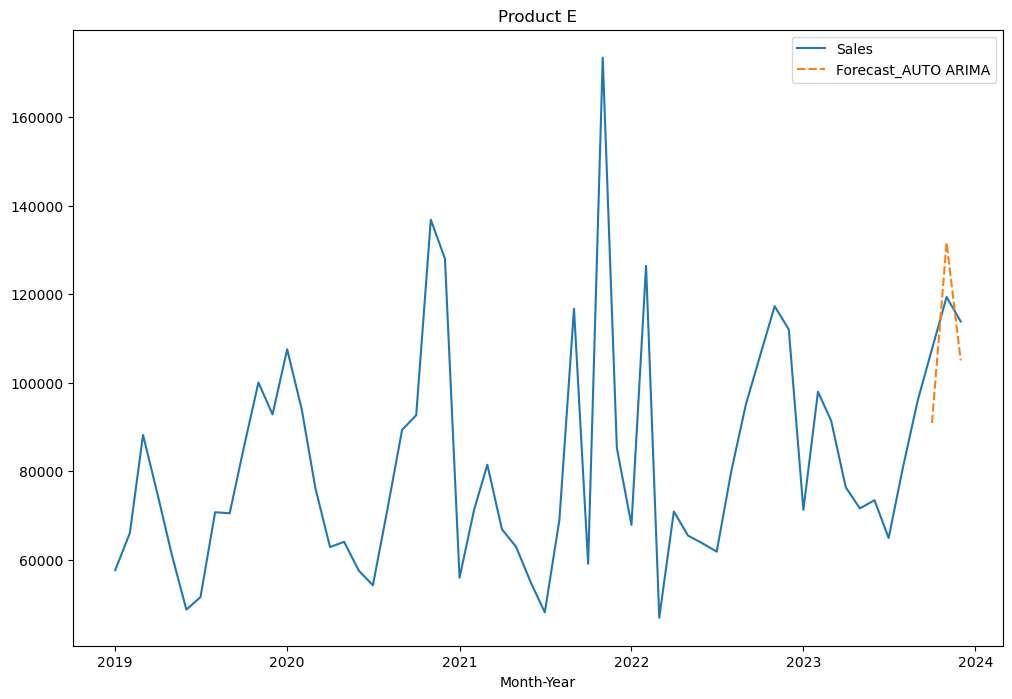

In [51]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_e[['Sales','Forecast_AUTO ARIMA']])
plt.title('Product E')

In [52]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 12598.522288496848
MAPE - AUTO ARIMAX: 0.11183960755022315
MSE - AUTO ARIMAX: 169123387.33992776
RMSE - AUTO ARIMAX: 13004.744801030422


In [53]:
sales_e.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMA
Month-Year,,,,,,
2023-01-01,71268,317822,1332763,NaN,NaN,NaN
2023-02-01,97965,436878,1832017,NaN,NaN,NaN
2023-03-01,91393,407570,1709115,NaN,NaN,NaN
2023-04-01,76364,340548,1428062,NaN,NaN,NaN
2023-05-01,71591,319262,1338804,NaN,NaN,NaN
2023-06-01,73457,327584,1373699,NaN,NaN,NaN
2023-07-01,64909,289464,1213845,NaN,NaN,NaN
2023-08-01,81175,362003,1518031,NaN,NaN,NaN
2023-09-01,96096,428543,1797065,NaN,NaN,NaN


In [54]:
sales_e.mean()

Sales                  8.209883e+04
Market Size            3.769448e+05
Marketing Expense      1.633066e+06
Forecast_ARIMAX        9.845701e+04
Forecast_SARIMAX       1.113957e+05
Forecast_AUTO ARIMA    1.092012e+05
dtype: float64

In [55]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,15146.326416,0.131419,2.663832e+08,16321.249748
AUTO ARIMAX,12598.522288,0.111840,1.691234e+08,13004.744801
SEASONAL ARIMAX,2645.307346,0.024317,1.590790e+07,3988.470998


# TESTING

In [24]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=6,max_q=2,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1318.257, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1312.179, Time=0.07 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1307.947, Time=0.19 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1319.244, Time=0.08 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1314.140, Time=0.30 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1309.935, Time=0.28 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1320.766, Time=0.26 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1310.304, Time=1.15 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1311.778, Time=0.76 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1318.215, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1314.300, Time=0.12 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1310.812, Time=0.34 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1319.508, Time=0.13 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1316.292, Time=0.53 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1312.811, Time=0.47

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [25]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:                             y   No. Observations:                   57
Model:             SARIMAX(0, 0, [1, 2], 12)   Log Likelihood                -649.973
Date:                       Wed, 08 May 2024   AIC                           1307.947
Time:                               19:27:14   BIC                           1316.119
Sample:                           01-01-2019   HQIC                          1311.123
                                - 09-01-2023                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.044e+04   7550.956     10.653      0.000    6.56e+04    9.52e+04
ma.S.L12       0.3246      0.163      1.997      0.046       0.006       0.643
ma.S.L24       0.4092      0.382      1.072      0.284      -0.339       1.157
sigma2      6.041e+08      0.068   8.94e+09      0.000    6.04e+08    6.04e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.23
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             1.21
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+26. Standard errors may be unstable.
"""

In [26]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_e['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product E')

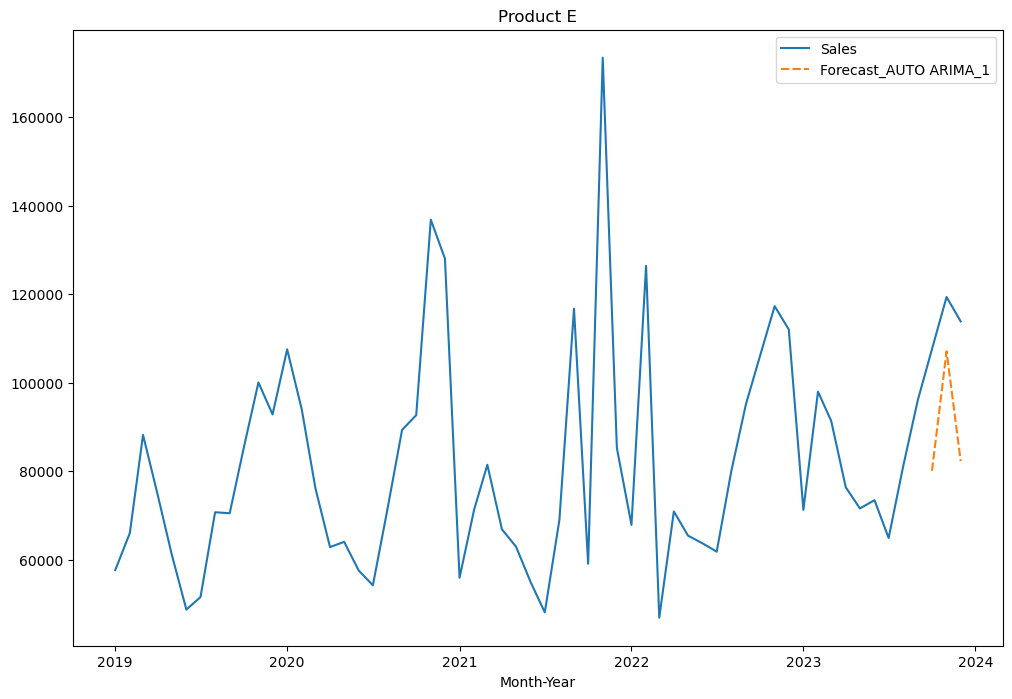

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_e[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product E')

In [28]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 23777.082309690737
MAPE - AUTO ARIMA: 0.2118696502230122
MSE - AUTO ARIMA: 634341446.7493347
RMSE - AUTO ARIMA: 25186.13600275625
